# DIABETES PREDICTION MODELLING

<a id='contents'></a>

## Contents

<br>1. [Importing the Required Libraries](#libraries)<br>2. [Loading the Data](#data)<br>3. [Data Analysis](#analysis)<br>4. [Initial Model](#initial)<br>5. [Outliers Analysis](#outlier)<br>6. [Standardization](#scaler)<br>7. [Feeding Processed Data to Model](#second)<br>8. [Hyperparameter Tuning](#tuning)<br>9. [Results](#result)<br>10. [Summary](#summary)

<a id='libraries'></a>

## Importing the Required Libraries

In [1]:
# basic analysis library
import sys
import numpy as np
import pandas as pd

# visual eda library
from pandas_profiling import ProfileReport
import webbrowser as web

# visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# feature engineering library
from sklearn.preprocessing import StandardScaler

# classification modelling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# performance measurement library
from sklearn import metrics as m

# enable display of complete array/dataframe/series
np.set_printoptions(threshold = sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

print('All Required Libraries Imported')

All Required Libraries Imported


[Back to Contents](#contents)

<a id='data'></a>

## Loading the Data

In [2]:
data = pd.read_csv('diabetes_data.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


[Back to Contents](#contents)

<a id='analysis'></a>

## Data Analysis

#### We have already seen that the data contains only numerical features, let us check whether any of them are stored as text.

In [3]:
# classification of features
numerical = [var for var in data.columns if data[var].dtype != 'O' and var != 'Outcome']
categorical = [var for var in data.columns if data[var].dtype == 'O' and var != 'Outcome']
target = ['Outcome']
print('There are', len(numerical), 'numerical variables')
print('There are', len(categorical), 'categorical variables')
print('There are', len(target), 'target variables')

There are 8 numerical variables
There are 0 categorical variables
There are 1 target variables


#### So there are no features which are stored as text, so we can safely proceed. Let us see the summary statistics of the data.

In [4]:
# summary statistics of data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### We will be using this statistical data later in our analysis.

In [5]:
# number and percentage of null values in data
sum_null = data.isnull().sum()
mean_null = data.isnull().mean()
nulls = pd.concat([sum_null, mean_null], axis = 1)
nulls.rename(columns = {0:'count', 1:'percentage'}, inplace = True)
nulls

,count,percentage
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


#### From the above table, it is obvious that there are no null values in our data.

In [6]:
# identifying duplicate rows
data[data.duplicated()].shape[0]

0

#### Nor there are any duplicate rows.

<AxesSubplot:>

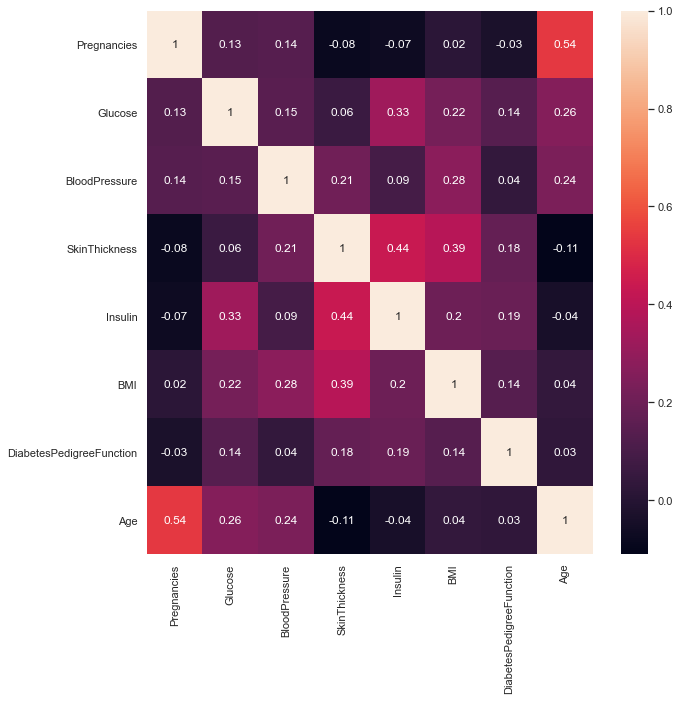

In [7]:
# correlation matrix of the data
figure = plt.figure(figsize = (10, 10))
corr_matrix = data[numerical].corr().round(2)
sns.heatmap(data = corr_matrix, annot = True)

# the less correlation, the better. More correlation means presence of duplication of features

#### From the above heatmap, it can be seen that there is a high correlation between Pregnancies and Age (about 54%). Since the data size is small, it is obvious and we can ignore this for now.

<AxesSubplot:xlabel='Age', ylabel='Density'>

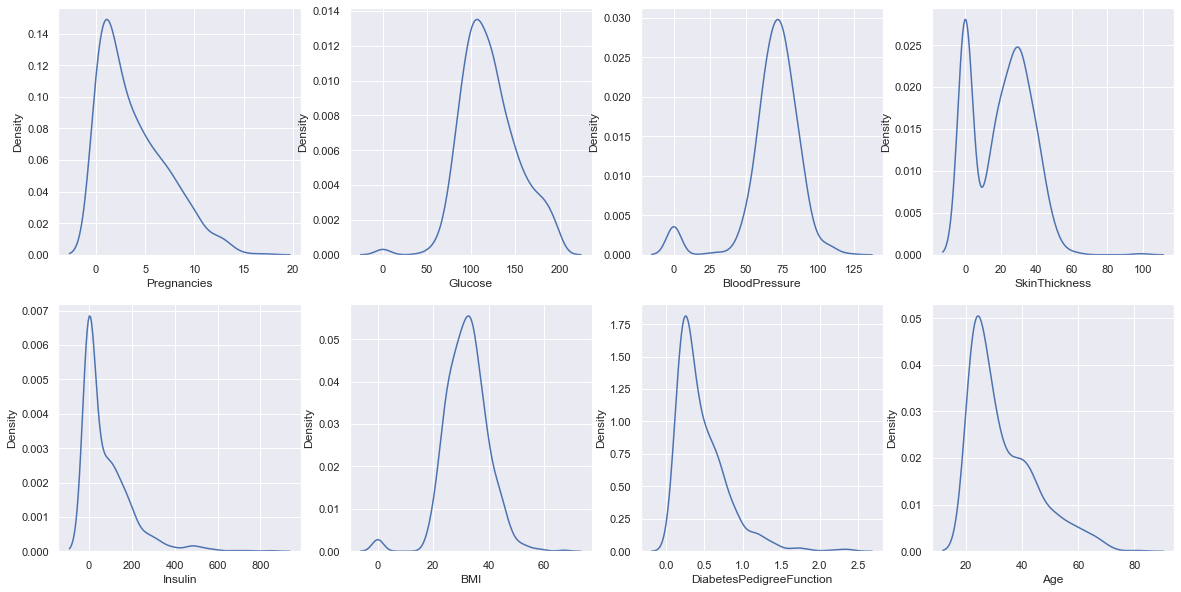

In [8]:
# distribution of all features
fig, axes = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))

sns.kdeplot(data['Pregnancies'], ax = axes[0,0])
sns.kdeplot(data['Glucose'], ax = axes[0,1])
sns.kdeplot(data['BloodPressure'], ax = axes[0,2])
sns.kdeplot(data['SkinThickness'], ax = axes[0,3])
sns.kdeplot(data['Insulin'], ax = axes[1,0])
sns.kdeplot(data['BMI'], ax = axes[1,1])
sns.kdeplot(data['DiabetesPedigreeFunction'], ax = axes[1,2])
sns.kdeplot(data['Age'], ax = axes[1,3])

#### The above plots show that most of the features do not follow normal distribution.

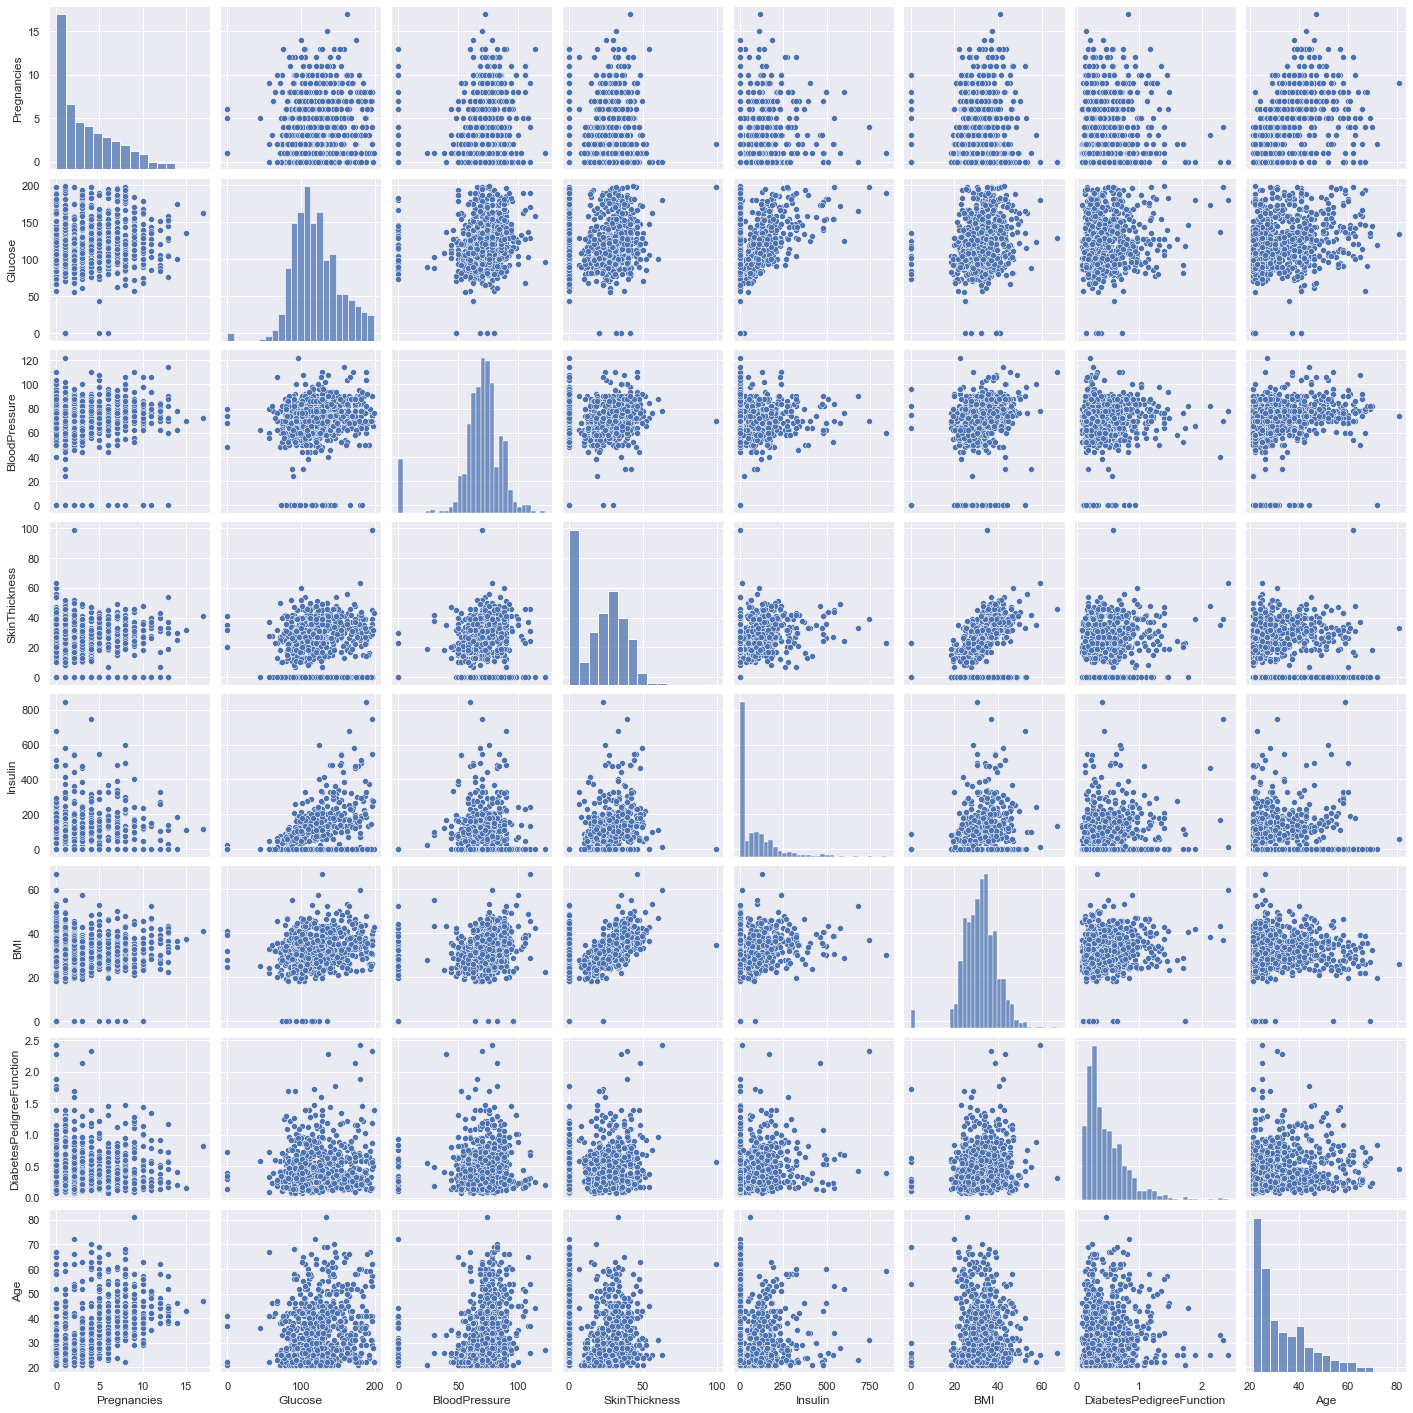

In [9]:
# pairplot for data
sns.pairplot(data[numerical])
plt.show()

[Back to Contents](#contents)

<a id='initial'></a>

## Initial Model

#### Since there are no missing values, let's run a sample model to check on the performance of the model on the current data.

In [10]:
# splitting data into train and test datasets
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [11]:
# RandomForestClassifier model
imodel = RandomForestClassifier()
imodel.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# training and testing accuracy
print('Training Accuracy:', imodel.score(X_train, y_train))
print('Testing Accuracy:', imodel.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8116883116883117


#### The training accuracy is 100%, which indicates that the model is clearly overfitting. The same would be for other tree based models. So tree based algorithms are not suitable for this type of data.

In [13]:
# LogisticRegression model
imodel2 = LogisticRegression()
imodel2.fit(X_train, y_train)

LogisticRegression()

In [14]:
# training and testing accuracy
print('Training Accuracy:', imodel2.score(X_train, y_train))
print('Testing Accuracy:', imodel2.score(X_test, y_test))

Training Accuracy: 0.7719869706840391
Testing Accuracy: 0.8246753246753247


#### Here the training and testing accuracies are quite low, plus the testing accuracy is greater than the training accuracy. So we need to process and correct the data in order to improve the accuracies.

[Back to Contents](#contents)

<a id='outlier'></a>

## Outliers Analysis

#### Let us use a copy of the original data for comparison after cleaning and processing.

In [15]:
# copy of orignial data, for comparison purpose
data_clean = data.copy()
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### First we need to check for the outliers. This can be found out by plotting boxplots for each feature.

<AxesSubplot:ylabel='Age'>

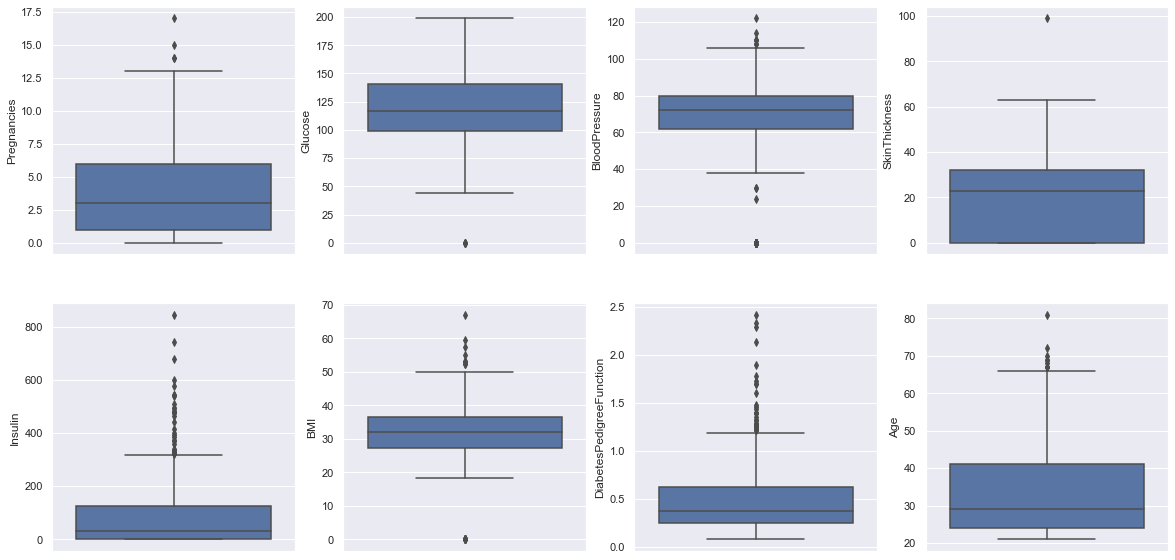

In [16]:
# outlier distribution of all features
fig, axes = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))

sns.boxplot(y = data_clean['Pregnancies'], ax = axes[0,0])
sns.boxplot(y = data_clean['Glucose'], ax = axes[0,1])
sns.boxplot(y = data_clean['BloodPressure'], ax = axes[0,2])
sns.boxplot(y = data_clean['SkinThickness'], ax = axes[0,3])
sns.boxplot(y = data_clean['Insulin'], ax = axes[1,0])
sns.boxplot(y = data_clean['BMI'], ax = axes[1,1])
sns.boxplot(y = data_clean['DiabetesPedigreeFunction'], ax = axes[1,2])
sns.boxplot(y = data_clean['Age'], ax = axes[1,3])

#### It can be seen that outliers exist for all the features. So we need to analyze the outliers of each feature and replace them with suitable values according to the type and characteristic of the feature.

### Pregnancies

<AxesSubplot:ylabel='Pregnancies'>

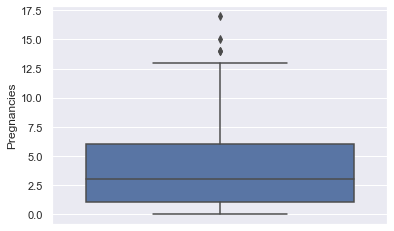

In [17]:
# boxplot of Pregnancies to check for outliers
sns.boxplot(y = data_clean['Pregnancies'])

#### For Pregnancies, the outliers exist above the upper whisker. Let us take a look at the summary statistics.

In [18]:
# summary statistics of Pregnancies
print(data_clean['Pregnancies'].describe())
iqr_pr = data_clean['Pregnancies'].describe()['75%'] - data_clean['Pregnancies'].describe()['25%']
print('Inter Quartile Range ', iqr_pr)
lower_limit_pr = data_clean['Pregnancies'].describe()['25%'] - (1.5 * iqr_pr)
upper_limit_pr = data_clean['Pregnancies'].describe()['75%'] + (1.5 * iqr_pr)
print('Lower Limit ', lower_limit_pr)
print('Upper Limit ', upper_limit_pr)

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
Inter Quartile Range  5.0
Lower Limit  -6.5
Upper Limit  13.5


#### The feature values often affect the target values, so we need to see the summary statistics of each feature according to the outcome.

In [19]:
# target level summary statistics
preg_stats = pd.concat([data_clean[data_clean['Outcome'] == 0]['Pregnancies'].describe(), data_clean[data_clean['Outcome'] == 1]['Pregnancies'].describe()], axis = 1)
preg_stats.columns = ['Outcome 0','Outcome 1']
preg_stats

,Outcome 0,Outcome 1
count,500.000000,268.000000
mean,3.298000,4.865672
std,3.017185,3.741239
min,0.000000,0.000000
25%,1.000000,1.750000
50%,2.000000,4.000000
75%,5.000000,8.000000
max,13.000000,17.000000


#### Pregnancies can be 0, but it cannot be as high as the upper whisker value of 13, so it'd be best to replace outliers with the respective median values .

<AxesSubplot:ylabel='Pregnancies'>

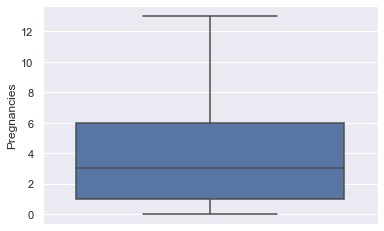

In [20]:
# replacing outliers with 2nd Quartile value

# outcome 0
data_clean.loc[(data_clean['Pregnancies'] > upper_limit_pr) & (data_clean['Outcome'] == 0), 'Pregnancies'] = data_clean[data_clean['Outcome'] == 0]['Pregnancies'].describe()['50%']

# outcome 1
data_clean.loc[(data_clean['Pregnancies'] > upper_limit_pr) & (data_clean['Outcome'] == 1), 'Pregnancies'] = data_clean[data_clean['Outcome'] == 1]['Pregnancies'].describe()['50%']

sns.boxplot(y = data_clean['Pregnancies'])

#### From the above boxplot, it is certain that the outliers have been removed. So this feature has been cleaned. Let's move to the next feature.

### Glucose

<AxesSubplot:ylabel='Glucose'>

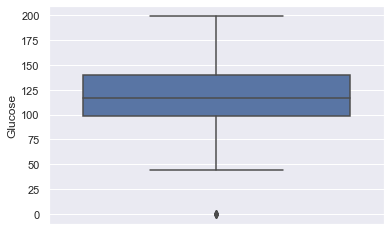

In [21]:
# boxplot of Glucose to check for outliers
sns.boxplot(y = data_clean['Glucose'])

#### For Glucose, the outliers exist below the lower whisker.

In [22]:
# summary statistics of Glucose
print(data_clean['Glucose'].describe())
iqr_gl = data_clean['Glucose'].describe()['75%'] - data_clean['Glucose'].describe()['25%']
print('Inter Quartile Range ', iqr_gl)
lower_limit_gl = data_clean['Glucose'].describe()['25%'] - (1.5 * iqr_gl)
upper_limit_gl = data_clean['Glucose'].describe()['75%'] + (1.5 * iqr_gl)
print('Lower Limit ', lower_limit_gl)
print('Upper Limit ', upper_limit_gl)

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
Inter Quartile Range  41.25
Lower Limit  37.125
Upper Limit  202.125


In [23]:
# target level summary statistics
glu_stats = pd.concat([data_clean[data_clean['Outcome'] == 0]['Glucose'].describe(), data_clean[data_clean['Outcome'] == 1]['Glucose'].describe()], axis = 1)
glu_stats.columns = ['Outcome 0','Outcome 1']
glu_stats

,Outcome 0,Outcome 1
count,500.0000,268.000000
mean,109.9800,141.257463
std,26.1412,31.939622
min,0.0000,0.000000
25%,93.0000,119.000000
50%,107.0000,140.000000
75%,125.0000,167.000000
max,197.0000,199.000000


#### The Glucose value cannot be 0, and it also cannot be as high as the maximum value (199), so we need to replace 0s with respective median values and upper (considerable) outliers with the respectuve 3rd quartile values.

<AxesSubplot:ylabel='Glucose'>

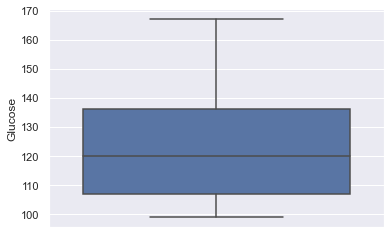

In [24]:
# replacing outliers with quartile values

# outcome 0
data_clean.loc[(data_clean['Glucose'] < data_clean['Glucose'].describe()['25%']) & (data_clean['Outcome'] == 0), 'Glucose'] = data_clean[data_clean['Outcome'] == 0]['Glucose'].describe()['50%']
data_clean.loc[(data_clean['Glucose'] > data_clean['Glucose'].describe()['75%']) & (data_clean['Outcome'] == 0), 'Glucose'] = data_clean[data_clean['Outcome'] == 0]['Glucose'].describe()['75%']

# outcome 1
data_clean.loc[(data_clean['Glucose'] < data_clean['Glucose'].describe()['25%']) & (data_clean['Outcome'] == 1), 'Glucose'] = data_clean[data_clean['Outcome'] == 1]['Glucose'].describe()['50%']
data_clean.loc[(data_clean['Glucose'] > data_clean['Glucose'].describe()['75%']) & (data_clean['Outcome'] == 1), 'Glucose'] = data_clean[data_clean['Outcome'] == 1]['Glucose'].describe()['75%']

sns.boxplot(y = data_clean['Glucose'])

#### From the above boxplot, it is certain that the outliers have been removed. So this feature has also been cleaned. Let's move to the next feature.

### Blood Pressure

<AxesSubplot:ylabel='BloodPressure'>

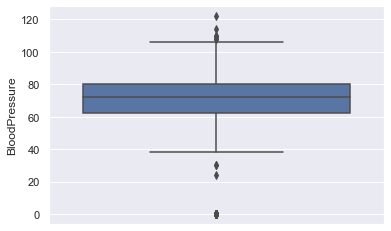

In [25]:
# boxplot of BloodPressure to check for outliers
sns.boxplot(y = data_clean['BloodPressure'])

#### The outliers for BloodPressure lie both above the upper whisker and below the lower whisker, so we need to analyze this data deeply.

In [26]:
# summary statistics of BloodPressure
print(data_clean['BloodPressure'].describe())
iqr_bp = data_clean['BloodPressure'].describe()['75%'] - data_clean['BloodPressure'].describe()['25%']
print('Inter Quartile Range ', iqr_bp)
lower_limit_bp = data_clean['BloodPressure'].describe()['25%'] - (1.5 * iqr_bp)
upper_limit_bp = data_clean['BloodPressure'].describe()['75%'] + (1.5 * iqr_bp)
print('Lower Whisker ', lower_limit_bp)
print('Upper Whisker ', upper_limit_bp)

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
Inter Quartile Range  18.0
Lower Whisker  35.0
Upper Whisker  107.0


In [27]:
# target level summary statistics
bp_stats = pd.concat([data_clean[data_clean['Outcome'] == 0]['BloodPressure'].describe(), data_clean[data_clean['Outcome'] == 1]['BloodPressure'].describe()], axis = 1)
bp_stats.columns = ['Outcome 0','Outcome 1']
bp_stats

,Outcome 0,Outcome 1
count,500.000000,268.000000
mean,68.184000,70.824627
std,18.063075,21.491812
min,0.000000,0.000000
25%,62.000000,66.000000
50%,70.000000,74.000000
75%,78.000000,82.000000
max,122.000000,114.000000


#### The BloodPressure value cannot be zero, and also it cannot be as high as the maximum values (122 and 114). So we will replace these small values with medians and higher values (>95) with 3rd quartile values.

<AxesSubplot:ylabel='BloodPressure'>

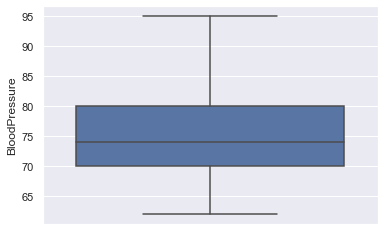

In [28]:
# replacing outliers with median and 3rd quartile values

# outcome 0
data_clean.loc[(data_clean['BloodPressure'] < data_clean['BloodPressure'].describe()['25%']) & (data_clean['Outcome'] == 0), 'BloodPressure'] = data_clean[data_clean['Outcome'] == 0]['BloodPressure'].describe()['50%']
data_clean.loc[(data_clean['BloodPressure'] > 95) & (data_clean['Outcome'] == 0), 'BloodPressure'] = data_clean[data_clean['Outcome'] == 0]['BloodPressure'].describe()['75%']

# outcome 1
data_clean.loc[(data_clean['BloodPressure'] < data_clean['BloodPressure'].describe()['25%']) & (data_clean['Outcome'] == 1), 'BloodPressure'] = data_clean[data_clean['Outcome'] == 1]['BloodPressure'].describe()['50%']
data_clean.loc[(data_clean['BloodPressure'] > 95) & (data_clean['Outcome'] == 1), 'BloodPressure'] = data_clean[data_clean['Outcome'] == 1]['BloodPressure'].describe()['75%']

sns.boxplot(y = data_clean['BloodPressure'])

#### From the above boxplot, it is certain that the outliers have been removed. So this feature has also been cleaned. Let's move to the next feature.

### SkinThickness

<AxesSubplot:ylabel='SkinThickness'>

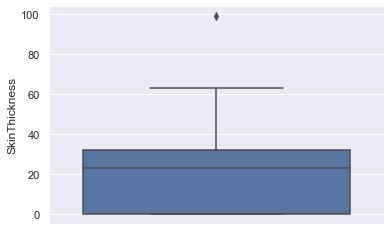

In [29]:
# boxplot of SkinThickness to check for outliers
sns.boxplot(y = data_clean['SkinThickness'])

#### The outliers for SkinThickness lie above the upper whisker. Let us have a look at the summary statistics

In [30]:
# summary statistics of SkinThickness
print(data_clean['SkinThickness'].describe())
iqr_st = data_clean['SkinThickness'].describe()['75%'] - data_clean['SkinThickness'].describe()['25%']
print('Inter Quartile Range ', iqr_st)
lower_limit_st = data_clean['SkinThickness'].describe()['25%'] - (1.5 * iqr_st)
upper_limit_st = data_clean['SkinThickness'].describe()['75%'] + (1.5 * iqr_st)
print('Lower Limit ', lower_limit_st)
print('Upper Limit ', upper_limit_st)

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
Inter Quartile Range  32.0
Lower Limit  -48.0
Upper Limit  80.0


In [31]:
# target level summary statistics
st_stats = pd.concat([data_clean[data_clean['Outcome'] == 0]['SkinThickness'].describe(), data_clean[data_clean['Outcome'] == 1]['SkinThickness'].describe()], axis = 1)
st_stats.columns = ['Outcome 0','Outcome 1']
st_stats

,Outcome 0,Outcome 1
count,500.000000,268.000000
mean,19.664000,22.164179
std,14.889947,17.679711
min,0.000000,0.000000
25%,0.000000,0.000000
50%,21.000000,27.000000
75%,31.000000,36.000000
max,60.000000,99.000000


#### The SkinThickness value cannot be 0. So we replace this value with the median, and the outliers with the 3rd Quartile values.

<AxesSubplot:ylabel='SkinThickness'>

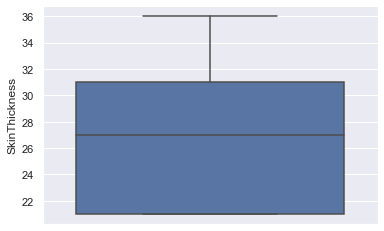

In [32]:
# replacing outliers with quartile value

# outcome 0
data_clean.loc[(data_clean['SkinThickness'] < data_clean['SkinThickness'].describe()['50%']) & (data_clean['Outcome'] == 0), 'SkinThickness'] = data_clean[data_clean['Outcome'] == 0]['SkinThickness'].describe()['50%']
data_clean.loc[(data_clean['SkinThickness'] > data_clean['SkinThickness'].describe()['75%']) & (data_clean['Outcome'] == 0), 'SkinThickness'] = data_clean[data_clean['Outcome'] == 0]['SkinThickness'].describe()['75%']

# outcome 1
data_clean.loc[(data_clean['SkinThickness'] < data_clean['SkinThickness'].describe()['50%']) & (data_clean['Outcome'] == 1), 'SkinThickness'] = data_clean[data_clean['Outcome'] == 1]['SkinThickness'].describe()['50%']
data_clean.loc[(data_clean['SkinThickness'] > data_clean['SkinThickness'].describe()['75%']) & (data_clean['Outcome'] == 1), 'SkinThickness'] = data_clean[data_clean['Outcome'] == 1]['SkinThickness'].describe()['75%']

sns.boxplot(y = data_clean['SkinThickness'])

#### From the above boxplot, it is certain that the outliers have been removed. So this feature has also been cleaned. Let's move to the next feature.

### Insulin

<AxesSubplot:ylabel='Insulin'>

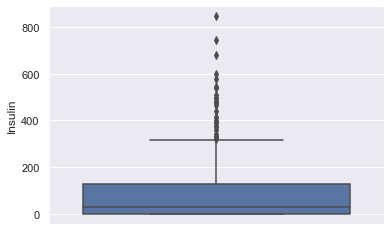

In [33]:
# boxplot of Insulin to check for outliers
sns.boxplot(y = data_clean['Insulin'])

#### The outliers for Insulin exist above the upper whisker, and there are a lot of these. Let us have a look at the summary statistics closely.

In [34]:
# summary statistics of Insulin
print(data_clean['Insulin'].describe())
iqr_in = data_clean['Insulin'].describe()['75%'] - data_clean['Insulin'].describe()['25%']
print('Inter Quartile Range ', iqr_in)
lower_limit_in = data_clean['Insulin'].describe()['25%'] - (1.5 * iqr_in)
upper_limit_in = data_clean['Insulin'].describe()['75%'] + (1.5 * iqr_in)
print('Lower Limit ', lower_limit_in)
print('Upper Limit ', upper_limit_in)

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
Inter Quartile Range  127.25
Lower Limit  -190.875
Upper Limit  318.125


In [35]:
# target level summary statistics
in_stats = pd.concat([data_clean[data_clean['Outcome'] == 0]['Insulin'].describe(), data_clean[data_clean['Outcome'] == 1]['Insulin'].describe()], axis = 1)
in_stats.columns = ['Outcome 0','Outcome 1']
in_stats

,Outcome 0,Outcome 1
count,500.000000,268.000000
mean,68.792000,100.335821
std,98.865289,138.689125
min,0.000000,0.000000
25%,0.000000,0.000000
50%,39.000000,0.000000
75%,105.000000,167.250000
max,744.000000,846.000000


#### There are outliers above the upper whisker, but insulin level value cannot be 0. So we need to replace these 0s with the median and the outliers with 3rd quartile values. Notice that the median of Insulin where Outcome = 1 is 0, so we replace this value with the overall median value.

<AxesSubplot:ylabel='Insulin'>

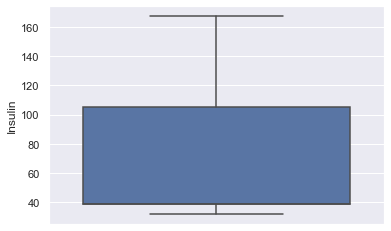

In [36]:
# replacing 0s with 2nd quartile value and outliers with 3rd quartile value

# outcome 0
data_clean.loc[(data_clean['Insulin'] < data_clean['Insulin'].describe()['50%']) & (data_clean['Outcome'] == 0), 'Insulin'] = data_clean[data_clean['Outcome'] == 0]['Insulin'].describe()['50%']
data_clean.loc[(data_clean['Insulin'] > data_clean['Insulin'].describe()['75%']) & (data_clean['Outcome'] == 0), 'Insulin'] = data_clean[data_clean['Outcome'] == 0]['Insulin'].describe()['75%']

# outcome 1
data_clean.loc[(data_clean['Insulin'] < data_clean['Insulin'].describe()['50%']) & (data_clean['Outcome'] == 1), 'Insulin'] = data_clean['Insulin'].describe()['50%']
data_clean.loc[(data_clean['Insulin'] > data_clean['Insulin'].describe()['75%']) & (data_clean['Outcome'] == 1), 'Insulin'] = data_clean[data_clean['Outcome'] == 1]['Insulin'].describe()['75%']

sns.boxplot(y = data_clean['Insulin'])

#### From the above boxplot, it is certain that the outliers have been removed. So this feature has also been cleaned. Let's move to the next feature.

### Body Mass Index (BMI)

<AxesSubplot:ylabel='BMI'>

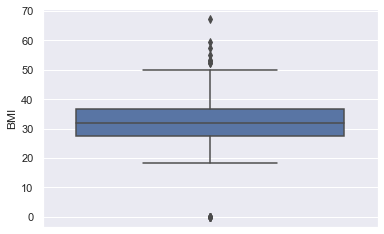

In [37]:
# boxplot of BMI to check for outliers
sns.boxplot(y = data_clean['BMI'])

#### The outliers for BMI exist both below the lower whisker and above the upper whisker. Let us have a close look at the summary statistics.

In [38]:
# summary statistics of BMI
print(data_clean['BMI'].describe())
iqr_bmi = data_clean['BMI'].describe()['75%'] - data_clean['BMI'].describe()['25%']
print('Inter Quartile Range ', iqr_bmi)
lower_limit_bmi = data_clean['BMI'].describe()['25%'] - (1.5 * iqr_bmi)
upper_limit_bmi = data_clean['BMI'].describe()['75%'] + (1.5 * iqr_bmi)
print('Lower Limit ', lower_limit_bmi)
print('Upper Limit ', upper_limit_bmi)

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
Inter Quartile Range  9.3
Lower Limit  13.35
Upper Limit  50.550000000000004


In [39]:
# target level summary statistics
bmi_stats = pd.concat([data_clean[data_clean['Outcome'] == 0]['BMI'].describe(), data_clean[data_clean['Outcome'] == 1]['BMI'].describe()], axis = 1)
bmi_stats.columns = ['Outcome 0','Outcome 1']
bmi_stats

,Outcome 0,Outcome 1
count,500.000000,268.000000
mean,30.304200,35.142537
std,7.689855,7.262967
min,0.000000,0.000000
25%,25.400000,30.800000
50%,30.050000,34.250000
75%,35.300000,38.775000
max,57.300000,67.100000


#### BMI value cannot be 0. So we need to replace these outliers with the 1st quartile and 3rd quartile values.

<AxesSubplot:ylabel='BMI'>

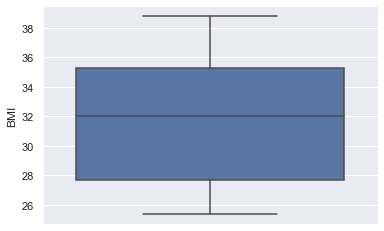

In [40]:
# replacing 0s with 1st quartile value and outliers with 3rd quartile value

# outcome 0
data_clean.loc[(data_clean['BMI'] < data_clean['BMI'].describe()['25%']) & (data_clean['Outcome'] == 0), 'BMI'] = data_clean[data_clean['Outcome'] == 0]['BMI'].describe()['25%']
data_clean.loc[(data_clean['BMI'] > data_clean['BMI'].describe()['75%']) & (data_clean['Outcome'] == 0), 'BMI'] = data_clean[data_clean['Outcome'] == 0]['BMI'].describe()['75%']

# outcome 1
data_clean.loc[(data_clean['BMI'] < data_clean['BMI'].describe()['25%']) & (data_clean['Outcome'] == 1), 'BMI'] = data_clean[data_clean['Outcome'] == 1]['BMI'].describe()['25%']
data_clean.loc[(data_clean['BMI'] > data_clean['BMI'].describe()['75%']) & (data_clean['Outcome'] == 1), 'BMI'] = data_clean[data_clean['Outcome'] == 1]['BMI'].describe()['75%']

sns.boxplot(y = data_clean['BMI'])

#### From the above boxplot, it is certain that the outliers have been removed. So this feature has also been cleaned. Let's move to the next feature.

### DiabetesPedigreeFunction

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

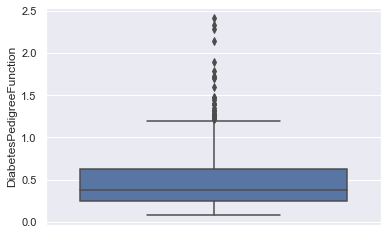

In [41]:
# boxplot of DiabetesPedigreeFunction to check for outliers
sns.boxplot(y = data_clean['DiabetesPedigreeFunction'])

#### The outliers largely lie above the upper whisker. Let us have a look at the summary statistics.

In [42]:
# summary statistics of DiabetesPedigreeFunction
print(data_clean['DiabetesPedigreeFunction'].describe())
iqr_dpf = data_clean['DiabetesPedigreeFunction'].describe()['75%'] - data_clean['DiabetesPedigreeFunction'].describe()['25%']
print('Inter Quartile Range ', iqr_dpf)
lower_limit_dpf = data_clean['DiabetesPedigreeFunction'].describe()['25%'] - (1.5 * iqr_dpf)
upper_limit_dpf = data_clean['DiabetesPedigreeFunction'].describe()['75%'] + (1.5 * iqr_dpf)
print('Lower Limit ', lower_limit_dpf)
print('Upper Limit ', upper_limit_dpf)

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
Inter Quartile Range  0.38249999999999995
Lower Limit  -0.32999999999999996
Upper Limit  1.2


In [43]:
# target level summary statistics
dpf_stats = pd.concat([data_clean[data_clean['Outcome'] == 0]['DiabetesPedigreeFunction'].describe(), data_clean[data_clean['Outcome'] == 1]['DiabetesPedigreeFunction'].describe()], axis = 1)
dpf_stats.columns = ['Outcome 0','Outcome 1']
dpf_stats

,Outcome 0,Outcome 1
count,500.000000,268.000000
mean,0.429734,0.550500
std,0.299085,0.372354
min,0.078000,0.088000
25%,0.229750,0.262500
50%,0.336000,0.449000
75%,0.561750,0.728000
max,2.329000,2.420000


#### The lower values are valid, but we still need to replace the outliers. We will replace these outliers with the 3rd quartile values.

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

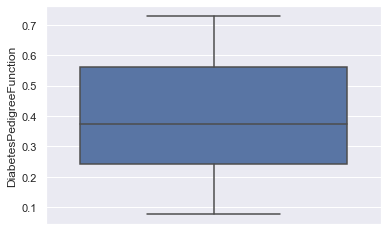

In [44]:
# replacing outliers with 3rd quartile value

# outcome 0
data_clean.loc[(data_clean['DiabetesPedigreeFunction'] > data_clean['DiabetesPedigreeFunction'].describe()['75%']) & (data_clean['Outcome'] == 0), 'DiabetesPedigreeFunction'] = data_clean[data_clean['Outcome'] == 0]['DiabetesPedigreeFunction'].describe()['75%']

# outcome 1
data_clean.loc[(data_clean['DiabetesPedigreeFunction'] > data_clean['DiabetesPedigreeFunction'].describe()['75%']) & (data_clean['Outcome'] == 1), 'DiabetesPedigreeFunction'] = data_clean[data_clean['Outcome'] == 1]['DiabetesPedigreeFunction'].describe()['75%']

sns.boxplot(y = data_clean['DiabetesPedigreeFunction'])

#### From the above boxplot, it is certain that the outliers have been removed. So this feature has also been cleaned. Let's move to the next feature.

### Age

<AxesSubplot:ylabel='Age'>

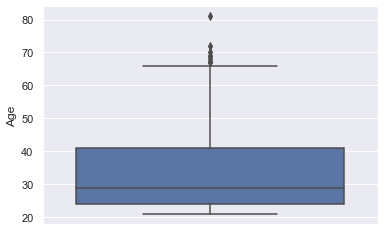

In [45]:
# boxplot of Age to check for outliers
sns.boxplot(y = data_clean['Age'])

#### The outliers for Age lie above the upper whisker, so we need to replace with appropriate values.

In [46]:
# summary statistics of Age
print('Mean\t', data_clean['Age'].mean())
print('Median\t', data_clean['Age'].median())
print(data_clean['Age'].describe())
iqr_age = data_clean['Age'].describe()['75%'] - data_clean['Age'].describe()['25%']
print('Inter Quartile Range ', iqr_age)
lower_limit_age = data_clean['Age'].describe()['25%'] - (1.5 * iqr_age)
upper_limit_age = data_clean['Age'].describe()['75%'] + (1.5 * iqr_age)
print('Lower Limit ', lower_limit_age)
print('Upper Limit ', upper_limit_age)

Mean	 33.240885416666664
Median	 29.0
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
Inter Quartile Range  17.0
Lower Limit  -1.5
Upper Limit  66.5


In [47]:
# target level summary statistics
age_stats = pd.concat([data_clean[data_clean['Outcome'] == 0]['Age'].describe(), data_clean[data_clean['Outcome'] == 1]['Age'].describe()], axis = 1)
age_stats.columns = ['Outcome 0','Outcome 1']
age_stats

,Outcome 0,Outcome 1
count,500.000000,268.000000
mean,31.190000,37.067164
std,11.667655,10.968254
min,21.000000,21.000000
25%,23.000000,28.000000
50%,27.000000,36.000000
75%,37.000000,44.000000
max,81.000000,70.000000


#### All the other values look valid, so we need to replace the outliers with the 3rd quartile values. Since the upper whisker value (66) itself is an outlier, we can reduce it to 60.

<AxesSubplot:ylabel='Age'>

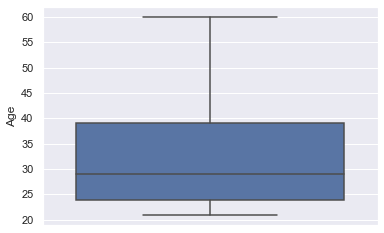

In [48]:
# replacing outliers with 3rd quartile value

# outcome 0
data_clean.loc[(data_clean['Age'] > 60) & (data_clean['Outcome'] == 0), 'Age'] = data_clean[data_clean['Outcome'] == 0]['Age'].describe()['75%']

# outcome 1
data_clean.loc[(data_clean['Age'] > 60) & (data_clean['Outcome'] == 1), 'Age'] = data_clean[data_clean['Outcome'] == 1]['Age'].describe()['75%']

sns.boxplot(y = data_clean['Age'])

#### From the above boxplot, it is certain that the outliers have been removed. So this feature has also been cleaned.

#### Now that all the features have been cleaned, let us compare the distributions of the features before and after cleaning.

<AxesSubplot:xlabel='Age', ylabel='Density'>

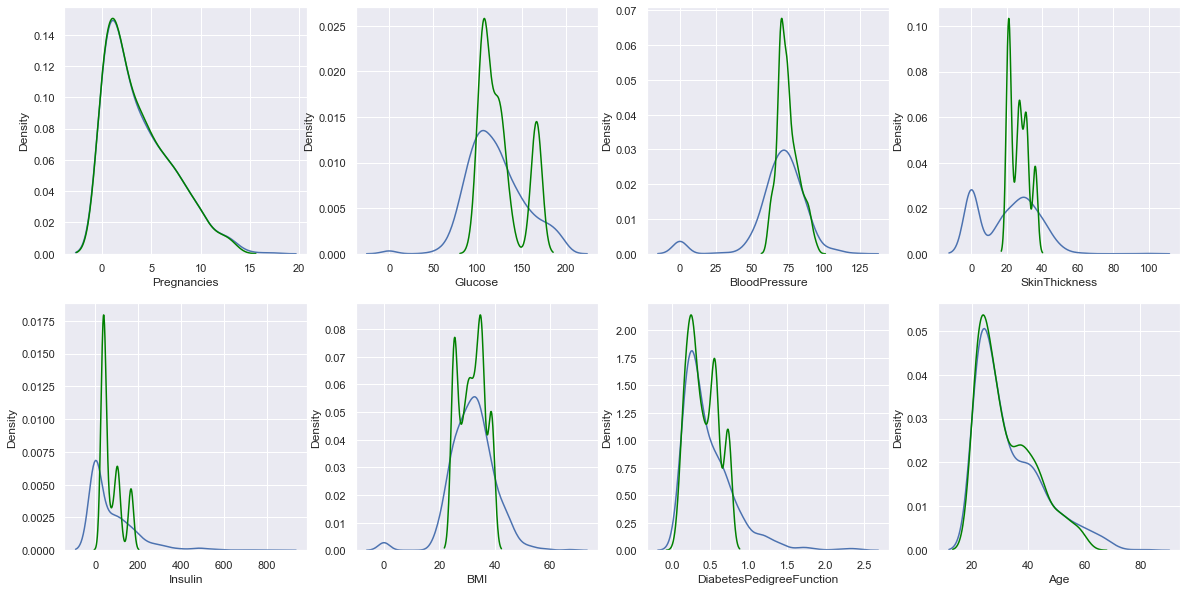

In [49]:
# distribution of all features before and after cleaning
fig, axes = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))

# before cleaning
sns.kdeplot(data['Pregnancies'], ax = axes[0,0])
sns.kdeplot(data['Glucose'], ax = axes[0,1])
sns.kdeplot(data['BloodPressure'], ax = axes[0,2])
sns.kdeplot(data['SkinThickness'], ax = axes[0,3])
sns.kdeplot(data['Insulin'], ax = axes[1,0])
sns.kdeplot(data['BMI'], ax = axes[1,1])
sns.kdeplot(data['DiabetesPedigreeFunction'], ax = axes[1,2])
sns.kdeplot(data['Age'], ax = axes[1,3])

# after cleaning
sns.kdeplot(data_clean['Pregnancies'], ax = axes[0,0], color = 'green')
sns.kdeplot(data_clean['Glucose'], ax = axes[0,1], color = 'green')
sns.kdeplot(data_clean['BloodPressure'], ax = axes[0,2], color = 'green')
sns.kdeplot(data_clean['SkinThickness'], ax = axes[0,3], color = 'green')
sns.kdeplot(data_clean['Insulin'], ax = axes[1,0], color = 'green')
sns.kdeplot(data_clean['BMI'], ax = axes[1,1], color = 'green')
sns.kdeplot(data_clean['DiabetesPedigreeFunction'], ax = axes[1,2], color = 'green')
sns.kdeplot(data_clean['Age'], ax = axes[1,3], color = 'green')

#### As we can see, the distribution is a bit distorted. This is because we have used different conditions based on the target. But all values lie within the same range, which is perfect for the data. 

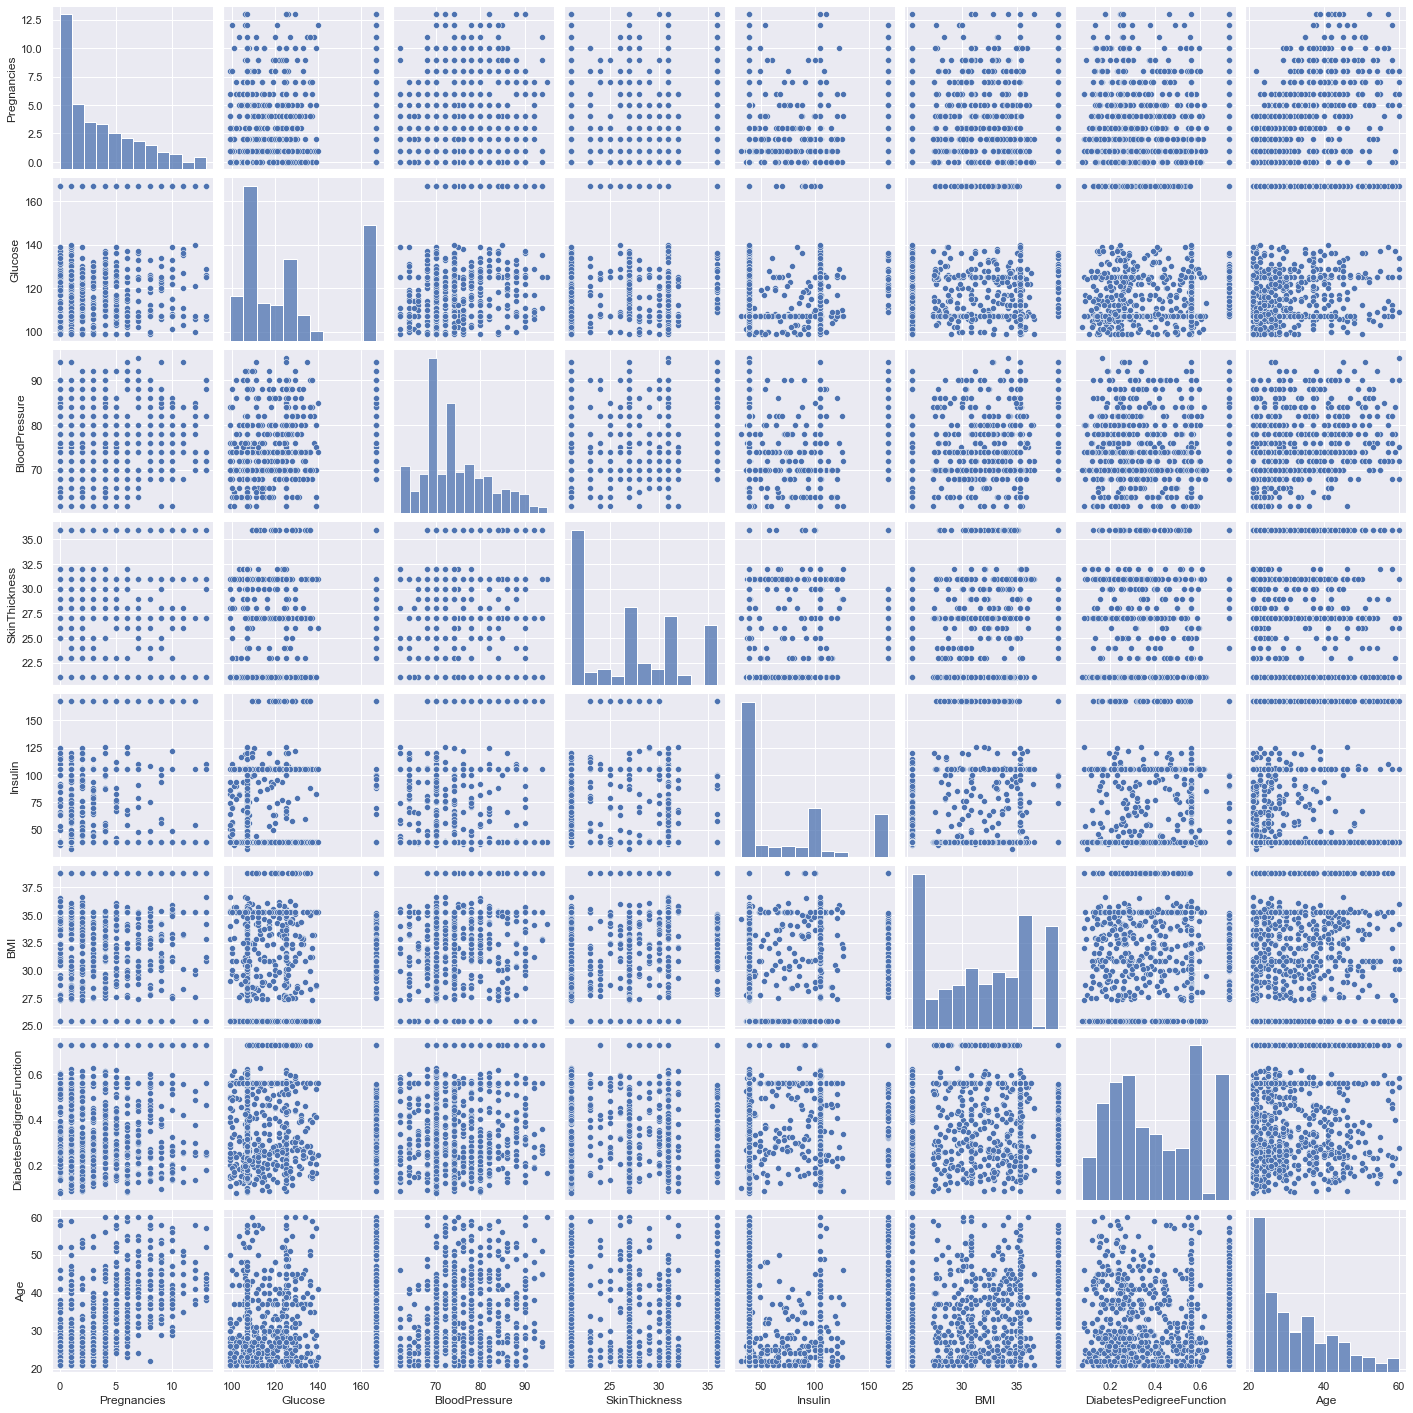

In [50]:
# pairplot for cleaned data
sns.pairplot(data_clean[numerical])
plt.show()

#### The above pairplot shows a neater correlation of all features with each other compared to the earlier one. Now that all variables are corrected, let's standardize the data.

[Back to Contents](#contents)

<a id='scaler'></a>

## Standardization

In [51]:
data_scal = data_clean.copy()
data_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,167.0,72.0,36.0,39.00,33.600,0.728,50.0,1
1,1.0,107.0,66.0,29.0,39.00,25.400,0.351,31.0,0
2,8.0,167.0,74.0,27.0,39.00,30.800,0.728,32.0,1
3,1.0,107.0,66.0,23.0,94.00,28.100,0.167,21.0,0
4,0.0,167.0,74.0,36.0,167.25,38.775,0.728,33.0,1


#### Take a look at the data above. All the features are at different scales. This would definitely affect the performance of the model. So we need to transform the data so that all features are at a common scale. For this purpose, we use Standardization.

In [52]:
# splitting into train and test datasets
X = data_scal.drop(['Outcome'], axis = 1)
y = data_scal['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((614, 8), (154, 8))

#### In Standardization, we first fit the standard scaler on the train data, then transform the train and test data based on the fitted scaler.

In [53]:
# fitting the scaler on the train data
scaler = StandardScaler()
scaler.fit(X_train[numerical])

StandardScaler()

In [54]:
# transforming X_train and X_test
X_train[numerical] = scaler.transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,0.963157,1.666299,0.433121,0.413930,1.963943,0.719080,1.715279,2.099247
118,0.059369,-0.855327,-0.672068,-0.737822,-0.789409,-0.812136,0.227381,-1.036854
247,-1.145681,-0.098839,2.090905,0.797848,0.627521,0.740955,0.143850,-0.938851
157,-0.844419,-0.771272,-0.672068,-1.121739,0.627521,-1.424622,0.847338,-0.938851
468,1.264420,-0.308974,-0.119474,0.030013,-0.789409,-0.418395,-1.130000,0.531196


#### As we can see, all the features are now at a common scale. This would definitely help in the model performance. Now that our data is ready to be fed to the model, let us run the model.

[Back to Contents](#contents)

<a id='second'></a>

## Feeding Processed Data to Model

#### As discussed in the beginning, tree-based algorithms (like Decision Tree, Random Forest, Gradient Boost etc.) are not suitable for this data as they overfit on this data. So we start with Logistic Regression.

In [55]:
# Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [56]:
# training and testing accuracy
print('Logistic Training Accuracy:', model_lr.score(X_train, y_train))
print('Logistic Testing Accuracy:', model_lr.score(X_test, y_test))

Logistic Training Accuracy: 0.8876221498371335
Logistic Testing Accuracy: 0.8636363636363636


#### The accuracies have improved very much compared to the initial model we ran at the beginning. So it can be said that our data was cleaned and scaled properly and effectively.

#### Let us feed the data to few other models as well and check their performance.

In [57]:
# Support Vector model
model_svm = SVC()
model_svm.fit(X_train, y_train)

# training and testing accuracy
print('SVM Training Accuracy:', model_svm.score(X_train, y_train))
print('SVM Testing Accuracy:', model_svm.score(X_test, y_test))

SVM Training Accuracy: 0.9413680781758957
SVM Testing Accuracy: 0.935064935064935


#### For SVM, the accuracies are better than those of Logistic Regression.

In [58]:
# KNeighborsClassifier model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# training and testing accuracy
print('KNN Training Accuracy:', model_knn.score(X_train, y_train))
print('KNN Testing Accuracy:', model_knn.score(X_test, y_test))

KNN Training Accuracy: 0.9495114006514658
KNN Testing Accuracy: 0.9415584415584416


#### For K-Nearest Neighbors, the accuracies are further better than those of Logistic and SVM models.

In [59]:
# MLPClassifier model
model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)

# training and testing accuracy
print('MLP Training Accuracy:', model_mlp.score(X_train, y_train))
print('MLP Testing Accuracy:', model_mlp.score(X_test, y_test))

MLP Training Accuracy: 0.9495114006514658
MLP Testing Accuracy: 0.8896103896103896


#### For MLP Classifier, the accuracies are considerable, but better than the initial model which we ran at the beginning.

[Back to Contents](#contents)

<a id='tuning'></a>

## Hyperparameter Tuning

#### Now that we have trained and tested for the accuracies, let's tune the hyperparameters by using the GridSearchCV function.

In [60]:
# best parameter function
def print_results(y_pred, model):
    print('\nBest Parameters:',model.best_params_)
    print('\nPrediction Metrics:\n')
    print('Training Accuracy:', model.score(X_train, y_train))
    print('Testing Accuracy:', model.score(X_test, y_test))
    print('Precision:', m.precision_score(y_test, y_pred, average = 'weighted'))
    print('Recall:', m.recall_score(y_test, y_pred, average = 'weighted'))
    print('F1-Score:', m.f1_score(y_test, y_pred, average = 'weighted'))

In [61]:
# Logistic Regression Model
model_lr = LogisticRegression(random_state = 0)
params_lr = {'C':[1,5,10,50], 'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'max_iter':[50,100,500]}
grid_lr = GridSearchCV(model_lr, params_lr, scoring = 'accuracy', cv = 5, verbose = 5, n_jobs = -1, return_train_score = True)
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50], 'max_iter': [50, 100, 500],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True, scoring='accuracy', verbose=5)

In [62]:
# best parameters
y_pred_lr = grid_lr.predict(X_test)
print_results(y_pred_lr, grid_lr)


Best Parameters: {'C': 1, 'max_iter': 50, 'solver': 'newton-cg'}

Prediction Metrics:

Training Accuracy: 0.8876221498371335
Testing Accuracy: 0.8636363636363636
Precision: 0.8617768595041323
Recall: 0.8636363636363636
F1-Score: 0.8623312171699268


In [63]:
# Support Vector Model
model_svm = SVC(random_state = 0)
params_svm = {'C':[1,5,10,50], 'kernel':['rbf','poly','sigmoid','linear']}
grid_svm = GridSearchCV(model_svm, params_svm, scoring = 'accuracy', cv = 5, verbose = 5, n_jobs = -1, return_train_score = True)
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             return_train_score=True, scoring='accuracy', verbose=5)

In [64]:
# best parameters
y_pred_svm = grid_svm.predict(X_test)
print_results(y_pred_svm, grid_svm)


Best Parameters: {'C': 5, 'kernel': 'rbf'}

Prediction Metrics:

Training Accuracy: 0.9788273615635179
Testing Accuracy: 0.961038961038961
Precision: 0.9609383480943113
Recall: 0.961038961038961
F1-Score: 0.9607958466654118


In [65]:
# K-Nearest Neighbors Model
model_knn = KNeighborsClassifier()
params_knn = {'n_neighbors':[5,10,20,50]}
grid_knn = GridSearchCV(model_knn, params_knn, scoring = 'accuracy', cv = 5, verbose = 5, n_jobs = -1, return_train_score = True)
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 20, 50]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [66]:
# best parameters
y_pred_knn = grid_knn.predict(X_test)
print_results(y_pred_knn, grid_knn)


Best Parameters: {'n_neighbors': 5}

Prediction Metrics:

Training Accuracy: 0.9495114006514658
Testing Accuracy: 0.9415584415584416
Precision: 0.942041589363018
Recall: 0.9415584415584416
F1-Score: 0.9405839658263854


In [67]:
# MLP Classifier
model_nn = MLPClassifier(random_state = 0)
params_nn = {'solver':['lbfgs','sgd','adam'], 'hidden_layer_sizes':[(50,50,50),(50,100,50),(100,)], 
             'learning_rate':['constant','invscaling','adaptive'], 'activation':['identity','logistic','tanh','relu']}
grid_nn = GridSearchCV(model_nn, params_nn, scoring = 'accuracy', cv = 5, verbose = 5, n_jobs = -1, return_train_score = True)
grid_nn.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             return_train_score=True, scoring='accuracy', verbose=5)

In [68]:
# best parameters
y_pred_nn = grid_nn.predict(X_test)
print_results(y_pred_nn, grid_nn)


Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Prediction Metrics:

Training Accuracy: 0.9820846905537459
Testing Accuracy: 0.9805194805194806
Precision: 0.9804985674550891
Recall: 0.9805194805194806
F1-Score: 0.9804600500774544


[Back to Contents](#contents)

<a id='result'></a>

## Results

#### We have seen some impressive results in the hyperparameter tuning phase. Let us put all of them into a dataframe and have a summary view of the results.

In [69]:
# performance metrics dataframe
perf_mets = pd.DataFrame({'Model':['LR','SVM','KNN','MLP'],
                          'Training Accuracy':[grid_lr.score(X_train, y_train), grid_svm.score(X_train, y_train), 
                                               grid_knn.score(X_train, y_train), grid_nn.score(X_train, y_train)],
                          'Testing Accuracy':[grid_lr.score(X_test, y_test), grid_svm.score(X_test, y_test), 
                                               grid_knn.score(X_test, y_test), grid_nn.score(X_test, y_test)],
                          'Precision':[m.precision_score(y_test, y_pred_lr, average = 'weighted'), 
                                      m.precision_score(y_test, y_pred_svm, average = 'weighted'), 
                                      m.precision_score(y_test, y_pred_knn, average = 'weighted'),
                                      m.precision_score(y_test, y_pred_nn, average = 'weighted')],
                          'Recall':[m.recall_score(y_test, y_pred_lr, average = 'weighted'), 
                                   m.recall_score(y_test, y_pred_svm, average = 'weighted'), 
                                   m.recall_score(y_test, y_pred_knn, average = 'weighted'), 
                                   m.recall_score(y_test, y_pred_nn, average = 'weighted')],
                          'F1-Score':[m.f1_score(y_test, y_pred_lr, average = 'weighted'), 
                                     m.f1_score(y_test, y_pred_svm, average = 'weighted'), 
                                     m.f1_score(y_test, y_pred_knn, average = 'weighted'), 
                                     m.f1_score(y_test, y_pred_nn, average = 'weighted')]
                         }).set_index('Model')

perf_mets_perc = perf_mets.style.format({'Training Accuracy': '{:,.2%}'.format,
                                    'Testing Accuracy': '{:,.2%}'.format,
                                    'Precision': '{:,.2%}'.format,
                                    'Recall': '{:,.2%}'.format,
                                    'F1-Score': '{:,.2%}'.format})
perf_mets_perc

,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score
Model,,,,,
LR,88.76%,86.36%,86.18%,86.36%,86.23%
SVM,97.88%,96.10%,96.09%,96.10%,96.08%
KNN,94.95%,94.16%,94.20%,94.16%,94.06%
MLP,98.21%,98.05%,98.05%,98.05%,98.05%


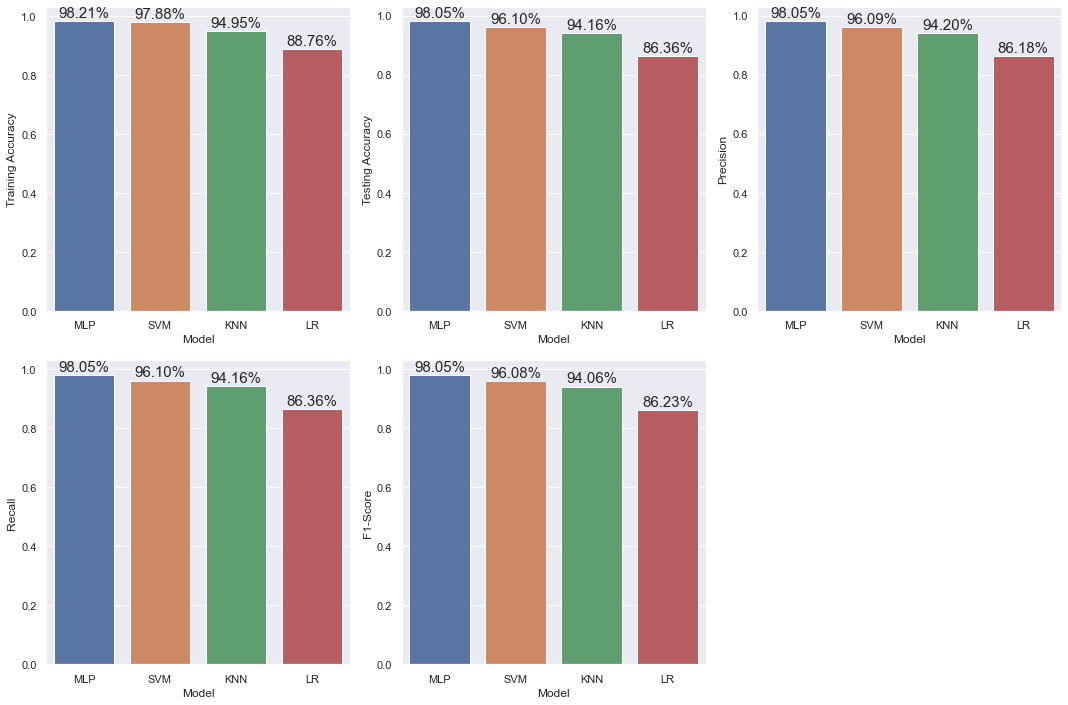

In [70]:
# comparing the performance metrics

fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (15, 10))

sns.barplot(x = perf_mets.index, y = perf_mets['Training Accuracy'], ax = axes[0,0], order = perf_mets.sort_values('Training Accuracy', ascending = False).index)
sns.barplot(x = perf_mets.index, y = perf_mets['Testing Accuracy'], ax = axes[0,1], order = perf_mets.sort_values('Testing Accuracy', ascending = False).index)
sns.barplot(x = perf_mets.index, y = perf_mets['Precision'], ax = axes[0,2], order = perf_mets.sort_values('Precision', ascending = False).index)
sns.barplot(x = perf_mets.index, y = perf_mets['Recall'], ax = axes[1,0], order = perf_mets.sort_values('Recall', ascending = False).index)
sns.barplot(x = perf_mets.index, y = perf_mets['F1-Score'], ax = axes[1,1], order = perf_mets.sort_values('F1-Score', ascending = False).index)

fig.delaxes(axes[1,2])

for i in range(2):
    for j in range(3):
        for bar in axes[i,j].patches:
            axes[i,j].annotate(format(bar.get_height(), '.2%'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', size = 15, xytext = (0, 8), textcoords = 'offset points')

fig.tight_layout()
plt.show()

#### The above plots shows the performance metrics of each model in decreasing order of their magnitudes. As per the plots, we can see that MLP Classifer performs better than the other algorithms.

[Back to Contents](#contents)

<a id='summary'></a>

## Summary

### In this notebook, 
#### 1. We have analyzed the data, the number of numerical and categorial variables and also the summary statistics of the dataset.
#### 2. We have run an initial model to check the performance of the model on the data.
#### 3. We have analyzed the outliers and handled them effectively with suitable techniques.
#### 4. We have standardized the features so that all features are on a common scale.
#### 5. We have run the models on the corrected and standardized data and have found out its performance metrics.
#### 6. We have tuned the hyperparameters of the models to get the model with best set of hyperparameters.